<a href="https://colab.research.google.com/github/jdcarrascali/Numerical-Analysis/blob/main/EcuacionesNoLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Bisección

Presentaremos una implementación del pseudocódigo de bisección en el texto guía.  En particular resolvemos la ecuación $\exp(x)-\sin(x)=0$

In [ ]:
def mifun(x):
  y=np.exp(x)-np.sin(x)
  return y

Podemos hacer una gráfica para tener una idea de los parámetros del método de bisección.

In [ ]:
def animacion_intervalo(a,e):

  x = np.arange(a, a+e, e/1000)
  y= mifun(x)
  plt.figure(figsize=(10, 5))
  plt.plot(x, y*0, 'b--',label='Funcion')
  plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
  plt.grid(color='g', linestyle='--', linewidth=.5)
  plt.show()


wd= interactive(animacion_intervalo, a=(-10, 10, .1), e=(0.1,10,.1))

wd

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=5.0, des…

En este caso observamos que para calcular la raíz de la derecha podemos usar $[-4,-3]$. Tenemos el siguiente script para general la gráfica.

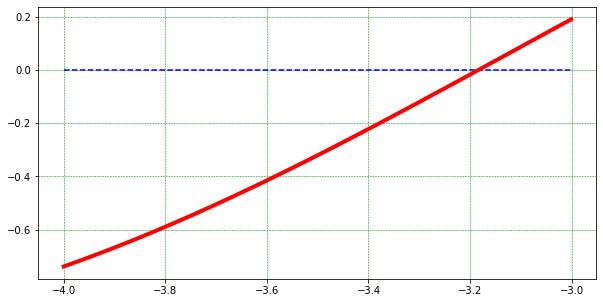

In [ ]:
a,b=-4,-3
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

El siguiente script implementa el método de bisección para la función arriba usando como datos de entrada $[-4,-3]$, con una tolerancia a la longitud del intervalo y al valor absoluto del residuo de $10^{-8}$.

In [ ]:
a,b,M,delb,epsb=-4,-3,100,1E-10,1E-10
print(a,b,M,delb,epsb)
u=mifun(a)
v=mifun(b)
e=b-a
if np.sign(u)!=np.sign(v):
  for k in range(1,M):
    e=e/2
    c=a+e
    w=mifun(c)
    print('c={0:.15f}'.format(c))
    if np.abs(e)<delb or np.abs(w)<epsb :
      break
    else:
      if np.sign(w)!=np.sign(u):
        b=c
        v=w
      else:
        a=c
        u=w
print(k,w,e)

-4 -3 100 1e-10 1e-10
c=-3.500000000000000
c=-3.250000000000000
c=-3.125000000000000
c=-3.187500000000000
c=-3.156250000000000
c=-3.171875000000000
c=-3.179687500000000
c=-3.183593750000000
c=-3.181640625000000
c=-3.182617187500000
c=-3.183105468750000
c=-3.182861328125000
c=-3.182983398437500
c=-3.183044433593750
c=-3.183074951171875
c=-3.183059692382812
c=-3.183067321777344
c=-3.183063507080078
c=-3.183061599731445
c=-3.183062553405762
c=-3.183063030242920
c=-3.183062791824341
c=-3.183062911033630
c=-3.183062970638275
c=-3.183063000440598
c=-3.183063015341759
c=-3.183063007891178
c=-3.183063011616468
c=-3.183063013479114
c=-3.183063012547791
c=-3.183063012082130
c=-3.183063011849299
32 8.747742807901915e-11 2.3283064365386963e-10


Observamos que en la iteración 26 el programa termina con la aproximación $-3.183063015341759$ con longitud del intervalo $|e|\approx 1.5\times 10^{-8}$ y con un residuo de $|w|\approx 3.5\times 10^{-9}$.

# Newton

En esta sección implementamos el método de newton. Esta vez crearemos una función con el método Newton que reciba los parámetros adecuados e imprima el valor de la aproximación. Otras cantidades pueden ser también incluidas en los parámetros de salida como el residuo y el número de iteraciones, o alternativamente pueden ser impresas dentro de la función.  Tenemos la siguiente función.

In [ ]:
def minewton(f,fp,x0,myeps,mydel,max_iter):
    '''f(x)=0 unando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : funnción
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    M : Número maximo de iteraciones
    ----------
    '''
    x = x0
    for n in range(0,max_iter):
        fx = f(x)
        if abs(fx) < myeps:
            print('residuo f(x(',n,'))=',fx)
            return x
        fpx = fp(x)
        if fpx == 0:
            print('Derivada nula. Error!')
            return None
        x = x - fx/fpx
        print( 'x(',n,')=',x)
        if abs(x-x0) < mydel:
            print('incremento delta(',n,')=',fx)
            return x
        x0=x
    print('Número máximo de iteraciones')
    return None


Usemos la función anterior para resolver la ecuaciones $\exp(x)-\sin(x)$

In [ ]:
f = lambda x: np.exp(x)-np.sin(x)
fp = lambda x: np.exp(x)-np.cos(x)
approx = minewton(f,fp,1,1e-10,1e-10,10)

x( 0 )= 0.13827893045637507
x( 1 )= -6.263457215119403
x( 2 )= -6.281316869638125
x( 3 )= -6.2813143662108075
residuo f(x( 4 ))= 1.2010791666794418e-14


Podemos usar la siguiente animación para explorar las dos primeras iteraciones de Newton. En particular intente inciar con $x_0\approx-5.12$.

In [ ]:
def animacion_intervalo(x0):

  x = np.arange(-10, 2, 0.1)
  y0= np.exp(x0)-np.sin(x0)
  y0p=np.exp(x0)-np.cos(x0)
  y= np.exp(x)-np.sin(x)
  L0=y0+y0p*(x-x0);
  x1=x0-y0/y0p;
  y1=np.exp(x1)-np.sin(x1)
  y1p=np.exp(x1)-np.cos(x1)
  L1=y1+y1p*(x-x1);
  x2=x1-y1/y1p;
  y2=np.exp(x2)-np.sin(x2)


  plt.figure(figsize=(15, 5))
  plt.plot(x, y, 'b--')
  plt.plot(x, 0*y, 'k')
  plt.plot(x0,0,color='g',marker='.',markersize=10, label='x_0')
  plt.plot(x, L0, 'g-',linewidth=1, label='Tangente en x_0')
  plt.plot(x0,y0,color='g',marker='.',markersize=10)
  plt.plot(x1,0,color='m',marker='.',markersize=10, label='x_1')
  plt.plot(x, L1, 'm-',linewidth=1,label='Tangente en x_1')
  plt.plot(x1,y1,color='m',marker='.',markersize=10)
  plt.plot(x2,0,color='c',marker='.',markersize=10, label='x_2')

  plt.grid(color='g', linestyle='--', linewidth=.5)
  plt.xlim(-10,-0)
  plt.ylim(-2, 4)
  plt.legend()
  plt.show()


wd= interactive(animacion_intervalo, x0=(-6, -2, .01))

wd

interactive(children=(FloatSlider(value=-4.0, description='x0', max=-2.0, min=-6.0, step=0.01), Output()), _do…

En este caso $x_0$ corresponde al punto magenta,
$x_1$ al unto verde y $x_2$ al punto azul claro.

# Punto Fijo


In [ ]:

def miFpf(x):
  y=x+np.exp(x)-np.sin(x)
  return y

In [ ]:
x0=-4
for n in range(1,10):
  x1=miFpf(x0)
  x0=x1
  print('x={0:.15f}'.format(x1))

x=-4.738486856419194
x=-5.729394447160081
x=-6.252060669705465
x=-6.281253801923153
x=-6.281314252785754
x=-6.281314365998385
x=-6.281314366210397
x=-6.281314366210795
x=-6.281314366210796


Observe que existen varias formas de trasformar $f(x)=0$ en una iteración de punto fijo $F(x)=x$.  Presentamos una illustración simple de la iteración. Ver tambien https://www.geogebra.org/m/qUbg7Z6W

[0.4472136  0.6687403  0.81776543 0.90430384 0.95094892 0.9751661
 0.98750499 0.99373285 0.9968615  0.99842952 0.99921445 0.99960715
 0.99980355 0.99990177 0.99995089 0.99997544 0.99998772 0.99999386
 0.99999693 0.99999847 0.99999923]
21


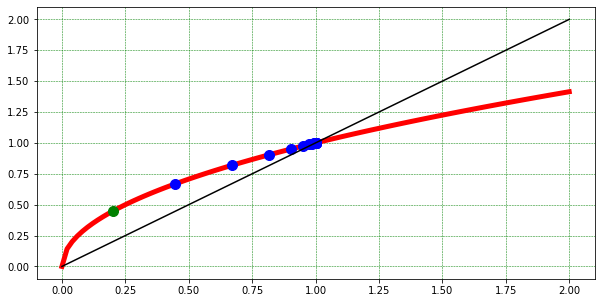

In [ ]:
def mif(x):
  y=np.sqrt(x)
  return y
tol,M,x0,difnorm,iter,xp= 1E-6,300,.2,1,0,[]
xini=x0

while(difnorm > tol and iter <  M):
  x1 = mif(x0)
  difnorm = np.linalg.norm(x0-x1)
  x0 = x1
  xp=np.append(xp,x1)  # save the solution of the current step
  iter = iter + 1



print(xp)
print(iter)
x = np.linspace(0,2,100)
y = mif(x)
plt.figure(figsize=(10, 5))
plt.plot(x,y,'r',linewidth=5)
plt.plot(xp,mif(xp),'bo',markersize=10)
plt.plot(x,x,'k')
plt.plot(xini,mif(xini),'.g',markersize=20)
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

# Librerias

Usamos la librería scipy.optimize.fsolve para resolver una ecuacion. Para informacion adicional puede consultar https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve

In [ ]:
from scipy.optimize import fsolve

def myfun2(x):
   y = np.exp(x)-np.sin(x)
   print(x,'\t\t',y)
   return y

z = fsolve(myfun2,-3)
print(z)
print(myfun2(z))

[-3] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-2.99999996] 		 [0.19090712]
[-3.18360341] 		 [-0.00056233]
[-3.18306419] 		 [-1.22193941e-06]
[-3.18306301] 		 [2.63640845e-11]
[-3.18306301] 		 [2.15105711e-16]
[-3.18306301]
[-3.18306301] 		 [2.15105711e-16]
[2.15105711e-16]


Obtenemos la raiz $r\approx-3.18306301$ con un residuo $\approx 2\times 10^{-16}$. Usemos ahora scipy para resolver un sistema de tres ecuaciones con tres incognitas. Agregamos print dentro de la función para imprimir los iterados.

In [ ]:
def myFvec(x):
  y = np.empty((3))
  y[0]=x[0]*x[1]-x[2]**2
  y[1]=x[0]*x[1]*x[2]-x[0]**2+x[1]**2
  y[2]=np.exp(x[0])-np.exp(y[1])+x[2]-3
  print(x)
  return y

x0 = np.array([0,1,0])
r = fsolve(myFvec,x0)
print(r)

[0 1 0]
[0. 1. 0.]
[0. 1. 0.]
[1.49011612e-08 1.00000000e+00 0.00000000e+00]
[0.         1.00000001 0.        ]
[0.00000000e+00 1.00000000e+00 1.49011612e-08]
[2.98023206e-08 5.00000004e-01 1.99999989e+00]
[2.15224589 0.63095647 0.40336098]
[0.70471843 0.75002461 1.92043266]
[1.71223427 0.71676582 0.90555853]
[1.28040009 0.89465479 0.62982444]
[1.12818885 0.84469574 0.83379873]
[1.04078636 0.70022687 0.85312251]
[1.1672988  0.71334999 0.97766916]
[1.11339844 0.73465633 0.87826283]
[1.12912734 0.72850593 0.90563147]
[1.12929794 0.72788239 0.9068089 ]
[1.12925282 0.72794401 0.90666318]
[1.12925139 0.727945   0.90666039]
[1.12925132 0.72794503 0.9066603 ]
[1.12925132 0.72794503 0.90666029]
[1.12925132 0.72794503 0.90666029]


# Problemas


**Problema (Kelley)** Considere el método de Shamanskii de orden $m$ definido de la siguiente manera. Dado $x_n$ calcule $x_{n+1}$ usando $m$ pasos del método de la cuerda, esto es,

$z_1=x_n-f(x_n)/f'(x_n)$

$z_{j+1}=z_{j}-f(z_j)/f'(x_n)$, $1\leq j\leq m-1$

$x_{n+1}=z_{m}$.

Observe que se avanza m pasos sin actualizar la derivada en el punto. Implemente el método para un orden $m$ definido por el usuario y verifique su código con una ecuación escalar.

**Solución:**


In [ ]:
def miShaminskii(f,fp,x0,m,myeps,mydel,max_iter):
    '''f(x)=0 usando  Shamanskii de orden  m:
    z_1=xn−f(xn)/f′(xn)
    z_{j+1}=zj−f(zj)/f′(xn), 1≤j≤m−1
    x{n+1}=zm.
    ----------
    f : funnción, fp : Derivada, x0 : Aproximación inicial
    m: orden de Shamanskii, myeps : Tolerancia residuo
    mydel : Tolerancia al incremento
    M : Número maximo de iteraciones
    ----------  '''
    x = x0
    for n in range(1,max_iter):
        fx = f(x)
        if abs(fx) < myeps:
            print('Resultado segun las entradas:')
            print('residuo f(x(',n,'))=',fx)
            print( 'x(',n,')=',x)
            print( 'se hicieron n=',n,' iteraciones')
            return x
        fpx = fp(x)
        if fpx == 0:
            print('Derivada nula. Error!')
            return None
        z=x-fx/fpx
        for r in range(1,m):
          fz=f(z)
          z=z-fz/fpx
        x = z
        print( 'x(',n,')=',x,'\t f(x(',n,'))=',fx)
        if abs(x-x0) < mydel:
            print('Resultado segun las entradas:')
            print('incremento delta(',n,')=',fx)
            print( 'x(',n,')=',x)
            print( 'se hicieron n=',n,' iteraciones')
            return x
        x0=x
    print('Número maximo de iteraciones')
    return None


Implementamos este código con $Sin(x)-Cos(x)=0$


In [ ]:
f=lambda x: np.sin(x)-np.cos(x)
fp=lambda x: np.cos(x)+np.sin(x)
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx = miShaminskii(f,fp,-3,i,1e-10,1e-10,10)
  print('\n\n')

Para m= 2  tenemos que:
x( 1 )= -2.3826397220789883 	 f(x( 1 ))= 0.8488724885405782
x( 2 )= -2.3561944923492635 	 f(x( 2 ))= 0.03739484655574332
x( 3 )= -2.356194490192345 	 f(x( 3 ))= 3.050343422295043e-09
Resultado segun las entradas:
residuo f(x( 4 ))= -1.1102230246251565e-16
x( 4 )= -2.356194490192345
se hicieron n= 4  iteraciones



Para m= 3  tenemos que:
x( 1 )= -2.3495794858941066 	 f(x( 1 ))= 0.8488724885405782
x( 2 )= -2.356194490192345 	 f(x( 2 ))= -0.009354960567209747
Resultado segun las entradas:
residuo f(x( 3 ))= -1.1102230246251565e-16
x( 3 )= -2.356194490192345
se hicieron n= 3  iteraciones



Para m= 4  tenemos que:
x( 1 )= -2.357850069526297 	 f(x( 1 ))= 0.8488724885405782
x( 2 )= -2.356194490192345 	 f(x( 2 ))= 0.0023413416780788676
Resultado segun las entradas:
residuo f(x( 3 ))= -1.1102230246251565e-16
x( 3 )= -2.356194490192345
se hicieron n= 3  iteraciones





**Problema (Kelley, Iterative methodos for linear and non linear equations)** Resuelva las siguientes ecuaiones $f(x)=0$ usando el Método de newton, el método de la secante (para este inicie la iteración en $x_{-1}$ con $x_{-1}=0.99x_0$) y el método de Shamanskii con $m=2,3,4$. Comente los resultados. Puede hacer tablas o plots con las iteraciones.


1.   $f(x)=\cos(x)-x$,  $\quad x_0=.5$.
2.   $f(x)=\arctan(x)$,  $\quad x_0=1$.
3.   $f(x)=\sin(x)$, $\quad  x_0=3$.
4.   $f(x)=x^2$,  $\quad  x_0=.5$.
5.   $f(x)=x^2+1$,  $\quad  x_0=10$.



Introducimos un algoritmo que implementa el método de la secante a continuacion:

In [ ]:
def miSecante(f,x0,x1,myeps,mydel,max_iter):
    '''f(x)=0 usando  secante:
    x_{n+1}=x_{n}+f(x_{n })((x_{n}-x_{n-1})/(f(x_{n})-f(x_{n-1})))
    ----------
    f : funnción,  x0 y x1 : Aproximaciones iniciales
    myeps : Tolerancia residuo
    mydel : Tolerancia al incremento
    M : Número maximo de iteraciones
    ----------  '''
    x=x1
    u=f(x0)
    v=f(x)
    for n in range(2,max_iter):
        if abs(u)<abs(v):
          t=x
          y=v
          x=x0
          x0=t
          v=u
          u=y
        if v-u == 0:
            print('Denominador nulo. Error!')
            return None
        s=(x-x0)/(v-u)
        x0=x
        u=v
        x=x-v*s
        v=f(x)
        print( 'x(',n,')=',x,'\t f(x(',n,'))=',v)
        if abs(v) < myeps:
            print('Resultado segun las entradas:')
            print('residuo f(x(',n,'))=',v)
            print( 'x(',n,')=',x)
            print( 'se hicieron n=',n,' iteraciones')
            return x
        if abs(x-x0) < mydel:
            print('Resultado segun las entradas:')
            print('incremento delta(',n,')=',v)
            print( 'x(',n,')=',x)
            print( 'se hicieron n=',n,' iteraciones')
            return x
    print('Número maximo de iteraciones')
    return None

Usamos el algoritmo para implementar Newton propuesto con un par de modificaciones:

In [ ]:
def minewton(f,fp,x0,myeps,mydel,max_iter):
    '''f(x)=0 usando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : función
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    M : Número maximo de iteraciones
    ----------
    '''
    x = x0
    for n in range(0,max_iter):
        fx = f(x)
        if abs(fx) < myeps:
            print('residuo f(x(',n,'))=',fx)
            return x
        fpx = fp(x)
        if fpx == 0:
            print('Derivada nula. Error!')
            return None
        x = x - fx/fpx
        print( 'x(',n,')=',x, '\t  f(x(',n,'))=',fx)
        if abs(x-x0) < mydel:
            print('incremento delta(',n,')=',fx)
            return x
        x0=x
    print('Número máximo de iteraciones')
    return None

***1. $f(x)=cos(x)-x$,   $x_0=0.5$***

In [ ]:
x0=0.5
x1=0.99*x0
f = lambda x: np.cos(x)-x
fp= lambda x: -np.sin(x)-1
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-10,1e-10,10)

print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-10,1e-10,10)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-10,1e-10,10)

Con Newton: 
x( 0 )= 0.7552224171056364 	  f(x( 0 ))= 0.37758256189037276
x( 1 )= 0.7391416661498792 	  f(x( 1 ))= -0.027103311857467283
x( 2 )= 0.7390851339208068 	  f(x( 2 ))= -9.461538061772412e-05
x( 3 )= 0.7390851332151607 	  f(x( 3 ))= -1.1809778710514252e-09
residuo f(x( 4 ))= 0.0


Con Shamanskii: 
Para m= 2  tenemos que:
x( 1 )= 0.7369022575908571 	 f(x( 1 ))= 0.37758256189037276
x( 2 )= 0.739085132196367 	 f(x( 2 ))= 0.003651524885634916
x( 3 )= 0.7390851332151607 	 f(x( 3 ))= 1.7050654221861805e-09
Resultado segun las entradas:
residuo f(x( 4 ))= 0.0
x( 4 )= 0.7390851332151607
se hicieron n= 4  iteraciones



Para m= 3  tenemos que:
x( 1 )= 0.739370462167804 	 f(x( 1 ))= 0.37758256189037276
x( 2 )= 0.739085133215161 	 f(x( 2 ))= -0.0004775600502353594
Resultado segun las entradas:
residuo f(x( 3 ))= -5.551115123125783e-16
x( 3 )= 0.739085133215161
se hicieron n= 3  iteraciones



Para m= 4  tenemos que:
x( 1 )= 0.7390476611631073 	 f(x( 1 ))= 0.37758256189037276
x( 2 )= 0.73

La velocidad de convergencia con el método de Shamanski de orden 3 y 4 fue mayor a la de los otros dos métodos en este caso. Por otra parte, como sabemos que tenemos garantizados 16 decimales de precisión y el método de Shamanski de orden 3 nos proporciona precisamente esta cantidad, elejimos este algoritmo por encima de los otros pues requiere menos iteraciones(actualizaciones) que el mismo método de orden 4.

**2.** $f(x)=arctan(x)$, $x_0=1$

In [ ]:
x0=1
x1=0.99*x0
f = lambda x: np.arctan(x)
fp= lambda x: 1/(1+x**2)
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-10,1e-10,10)
print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-10,1e-10,10)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-10,1e-10,10)

Con Newton: 
x( 0 )= -0.5707963267948966 	  f(x( 0 ))= 0.7853981633974483
x( 1 )= 0.1168599039989131 	  f(x( 1 ))= -0.5186693692550166
x( 2 )= -0.001061022117044716 	  f(x( 2 ))= 0.11633226511389591
x( 3 )= 7.963096044106416e-10 	  f(x( 3 ))= -0.0010610217188900932
x( 4 )= 0.0 	  f(x( 4 ))= 7.963096044106416e-10
residuo f(x( 5 ))= 0.0


Con Shamanskii: 
Para m= 2  tenemos que:
x( 1 )= 0.46654241171513666 	 f(x( 1 ))= 0.7853981633974483
x( 2 )= 0.014036315217348203 	 f(x( 2 ))= 0.4365251207796836
x( 3 )= 3.632094925656252e-10 	 f(x( 3 ))= 0.01403539352337165
x( 4 )= 0.0 	 f(x( 4 ))= 3.632094925656252e-10
Resultado segun las entradas:
residuo f(x( 5 ))= 0.0
x( 5 )= 0.0
se hicieron n= 5  iteraciones



Para m= 3  tenemos que:
x( 1 )= -0.4065078298442305 	 f(x( 1 ))= 0.7853981633974483
x( 2 )= 0.0011797263030160921 	 f(x( 2 ))= -0.3861039552502769
x( 3 )= -2.1202030620788625e-21 	 f(x( 3 ))= 0.0011797257557202231
Resultado segun las entradas:
residuo f(x( 4 ))= -2.1202030620788625e-21
x( 4

De nuevo elejimos Shamanski de orden 3 por su eficiencia.

3. $f(x)=sin(x), x_0=3$

In [ ]:
x0=3
x1=0.99*x0
f = lambda x: np.sin(x)
fp= lambda x: np.cos(x)
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-10,1e-10,10)
print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-10,1e-10,10)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-10,1e-10,10)

Con Newton: 
x( 0 )= 3.142546543074278 	  f(x( 0 ))= 0.1411200080598672
x( 1 )= 3.141592653300477 	  f(x( 1 ))= -0.0009538893398264409
x( 2 )= 3.141592653589793 	  f(x( 2 ))= 2.8931624907621843e-10
residuo f(x( 3 ))= 1.2246467991473532e-16


Con Shamanskii: 
Para m= 2  tenemos que:
x( 1 )= 3.141583011185802 	 f(x( 1 ))= 0.1411200080598672
x( 2 )= 3.141592653589793 	 f(x( 2 ))= 9.642403991234307e-06
Resultado segun las entradas:
residuo f(x( 3 ))= 1.2246467991473532e-16
x( 3 )= 3.141592653589793
se hicieron n= 3  iteraciones



Para m= 3  tenemos que:
x( 1 )= 3.1415927510616335 	 f(x( 1 ))= 0.1411200080598672
x( 2 )= 3.141592653589793 	 f(x( 2 ))= -9.747184025431897e-08
Resultado segun las entradas:
residuo f(x( 3 ))= 1.2246467991473532e-16
x( 3 )= 3.141592653589793
se hicieron n= 3  iteraciones



Para m= 4  tenemos que:
x( 1 )= 3.141592652604483 	 f(x( 1 ))= 0.1411200080598672
x( 2 )= 3.141592653589793 	 f(x( 2 ))= 9.853101782324207e-10
Resultado segun las entradas:
residuo f(x( 3 ))=

4. $f(x)=x^2, x_0=.5$

In [ ]:
x0=0.5
x1=0.99*x0
f = lambda x: x**2
fp= lambda x: 2*x
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-10,1e-10,10)
print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-10,1e-10,10)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-10,1e-10,10)

Con Newton: 
x( 0 )= 0.25 	  f(x( 0 ))= 0.25
x( 1 )= 0.125 	  f(x( 1 ))= 0.0625
x( 2 )= 0.0625 	  f(x( 2 ))= 0.015625
x( 3 )= 0.03125 	  f(x( 3 ))= 0.00390625
x( 4 )= 0.015625 	  f(x( 4 ))= 0.0009765625
x( 5 )= 0.0078125 	  f(x( 5 ))= 0.000244140625
x( 6 )= 0.00390625 	  f(x( 6 ))= 6.103515625e-05
x( 7 )= 0.001953125 	  f(x( 7 ))= 1.52587890625e-05
x( 8 )= 0.0009765625 	  f(x( 8 ))= 3.814697265625e-06
x( 9 )= 0.00048828125 	  f(x( 9 ))= 9.5367431640625e-07
Número máximo de iteraciones


Con Shamanskii: 
Para m= 2  tenemos que:
x( 1 )= 0.1875 	 f(x( 1 ))= 0.25
x( 2 )= 0.0703125 	 f(x( 2 ))= 0.03515625
x( 3 )= 0.0263671875 	 f(x( 3 ))= 0.00494384765625
x( 4 )= 0.0098876953125 	 f(x( 4 ))= 0.0006952285766601562
x( 5 )= 0.0037078857421875 	 f(x( 5 ))= 9.776651859283447e-05
x( 6 )= 0.0013904571533203125 	 f(x( 6 ))= 1.3748416677117348e-05
x( 7 )= 0.0005214214324951172 	 f(x( 7 ))= 1.933371095219627e-06
x( 8 )= 0.00019553303718566895 	 f(x( 8 ))= 2.7188031026526005e-07
x( 9 )= 7.332488894462

Observando las tolerancias al error notamos que es más conveniente el uso del método de Shamanskii de orden 4. Debemos tener en cuenta que en este caso la derivada es más sencilla de calcular y en los otros métodos tendríamos que re ajustar las tolerancias.

5. $f(x)=x^2+1, x_0=10$

In [ ]:
x0=10
x1=0.99*x0
f = lambda x: x**2+1
fp= lambda x: 2*x
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-10,1e-10,10)
print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-10,1e-10,10)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-10,1e-10,10)

Con Newton: 
x( 0 )= 4.95 	  f(x( 0 ))= 101
x( 1 )= 2.3739898989898993 	  f(x( 1 ))= 25.5025
x( 2 )= 0.9763790575685589 	  f(x( 2 ))= 6.635828040506072
x( 3 )= -0.023906665950920836 	  f(x( 3 ))= 1.9533160640584672
x( 4 )= 20.902715447124383 	  f(x( 4 ))= 1.0005715286768888
x( 5 )= 10.42743738645265 	  f(x( 5 ))= 437.9235130634523
x( 6 )= 5.165768273437701 	  f(x( 6 ))= 109.73145044839049
x( 7 )= 2.4860931128994133 	  f(x( 7 ))= 27.685161854855526
x( 8 )= 1.041927782013751 	  f(x( 8 ))= 7.180658966005895
x( 9 )= 0.04108418280517845 	  f(x( 9 ))= 2.0856135029320946
Número máximo de iteraciones


Con Shamanskii: 
Para m= 2  tenemos que:
x( 1 )= 3.674875 	 f(x( 1 ))= 101
x( 2 )= 1.1714708165901153 	 f(x( 2 ))= 14.504706265625002
x( 3 )= -0.2786719780030029 	 f(x( 3 ))= 2.3723438741223113
x( 4 )= 8.362873210784834 	 f(x( 4 ))= 1.0776580713241062
x( 5 )= 3.04618163865184 	 f(x( 5 ))= 70.93764833966263
x( 6 )= 0.891685996429961 	 f(x( 6 ))= 10.27922257565961
x( 7 )= -0.6830298879901185 	 f(x

Sospechamos que así cambiemos el el número máximo de iteraciones tendremos valores que no convergen a la raíz.

**Problema(Quarteroni, Saleri, Gervasio)** Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$s(t,\omega)= \frac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big] $$
donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos.

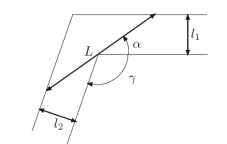

Procedemos a encontrar $ω$:
El siguiente gráfico nos indica que es adecuado usar $x_0=0.75$ y $x_1=0.99$ como puntos de arranque


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


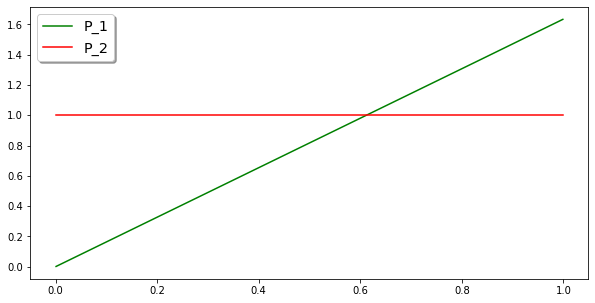

In [ ]:
a,b=0,1
g=9.8
x = np.arange(a, b, (b-a)/1000)
p1=(g/(2*x**2))*(np.sinh(x)-np.sin(x))
p2=1+0*x
plt.figure(figsize=(10, 5))
plt.plot(x, p1, 'g-',label='P_1')
plt.plot( x, p2, 'r-',label='P_2')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Intentaremos resolver la ecuación $f(x)=g(\sinh{x}-\sin{x})-2x^2=0$, usando tanto el método de Newton como el método de Shamanskii y el de la secante.

In [ ]:
x0=10
x1=0.99*x0
f = lambda x: g*(np.sinh(x)-np.sin(x))-2*x**2
fp= lambda x: g*(np.cosh(x)-np.cos(x))-4*x
print("Con Newton: ")
approx1 = minewton(f,fp,x0,1e-12,1e-10,30)
print("\n\nCon Shamanskii: ")
for i in range(2,5):
  print('Para m=',i,' tenemos que:')
  approx2 = miShaminskii(f,fp,x0,i,1e-12,1e-10,30)
  print('\n\n')
print("Con secante: ")
approx3 = miSecante(f,x0,x1,1e-12,1e-10,30)

Con Newton: 
x( 0 )= 9.001509685829726 	  f(x( 0 ))= 107735.01357897998
x( 1 )= 8.005007845338255 	  f(x( 1 ))= 39599.01852518841
x( 2 )= 7.012332775226064 	  f(x( 2 ))= 14542.17527952051
x( 3 )= 6.025196442784186 	  f(x( 3 ))= 5335.303877746846
x( 4 )= 5.043530840607945 	  f(x( 4 ))= 1957.1247535081554
x( 5 )= 4.068399668131907 	  f(x( 5 ))= 717.9418679520498
x( 6 )= 3.122876208052168 	  f(x( 6 ))= 261.11986560141764
x( 7 )= 2.283031454404483 	  f(x( 7 ))= 91.38301383869623
x( 8 )= 1.6346846252474485 	  f(x( 8 ))= 29.70938768103901
x( 9 )= 1.1861502812412692 	  f(x( 9 ))= 9.046456715637564
x( 10 )= 0.8955005505110132 	  f(x( 10 ))= 2.6505451174498837
x( 11 )= 0.7221520465265857 	  f(x( 11 ))= 0.7438152257196684
x( 12 )= 0.6378596948709976 	  f(x( 12 ))= 0.18763376757129113
x( 13 )= 0.6140632293237968 	  f(x( 13 ))= 0.03421150410552298
x( 14 )= 0.6121545208339647 	  f(x( 14 ))= 0.0023678070572903387
x( 15 )= 0.6121425711700332 	  f(x( 15 ))= 1.4640720880754188e-05
x( 16 )= 0.6121425707

Elegimos el cálculo hecho por el método de Shamanskii de orden 4, pues es el más eficiente en términos de número de iteraciones. Podemos asegurar el cálculo $ω=x( 25 )= 0.6121425707030943$ con precisión de 12 decimales por la manera en que tomamos las tolerancias.

**Problema (Quarteroni, Saleri, Gervasio)** La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la figura es
$$L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)} \ \ \ \ (1)$$
donde $\alpha$ es la solución de la ecuación
$$ l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0 \ \ \ \ (2).$$
Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

**Solución**
Note que
  \begin{split}
  \sin(\pi-\gamma-\alpha)
  &=\sin(\pi)\cos(\gamma+\alpha)-\cos(\pi)\sin(\gamma+\alpha)
&=\sin(\gamma+\alpha)
  \end{split}
Y que además,
\begin{split} cos(\pi-\gamma-\alpha)=\cos(\pi)\cos(\gamma+\alpha)+\sin(\pi)\sin(\gamma+\alpha)=-\cos(\gamma+\alpha)\end{split}
Reemplazando esto en la ecuación $(2)$ obtenemos:
$$-l_2 \frac{\cos(\gamma+\alpha)}{\sin^2(\gamma+\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.$$
Con $x\in(0,\pi-\gamma)$.

Resolveremos $f(x)=0$ con
$f(x)=-\Big(l_2 \frac{\cos(\gamma+x)}{\sin^2(\gamma+x)}+l_1\frac{\cos(x)}{\sin^2(x)}\Big)$,$l_2=10$, $l_1=8$, $\gamma=\frac{3\pi}{5} $ y $x\in(0,\pi-\gamma)=(0,2\pi/5)$



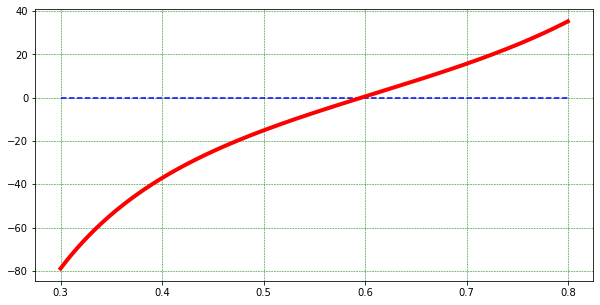

In [ ]:
l2,l1,p=10,8,3*np.pi/5
a,b=0.3,0.8
x = np.arange(a, b, (b-a)/1000)
y= -(l2*(np.cos(p+x))/(np.sin(p+x))**2+l1*(np.cos(x))/(np.sin(x))**2)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

A pesar de que ya poseemos la derivada esta requiere muchos operaciones, por lo tanto resulta mejor usar el método de la secante para calcular $L$ en este caso.

In [ ]:
f = lambda x: -(l2*(np.cos(p+x))/(np.sin(p+x))**2+l1*(np.cos(x))/(np.sin(x))**2)
x0=0.7
x1=0.99*x0
approx = miSecante(f,x0,x1,1e-12,1e-10,30)

x( 2 )= 0.6036510869139013 	 f(x( 2 ))= 1.078082247305126
x( 3 )= 0.5964927337878368 	 f(x( 3 ))= 0.031165037215540536
x( 4 )= 0.5962796411579462 	 f(x( 4 ))= -4.1931095857705714e-05
x( 5 )= 0.5962799274788538 	 f(x( 5 ))= 1.9596022582391015e-09
x( 6 )= 0.5962799274654735 	 f(x( 6 ))= -1.7763568394002505e-14
Resultado segun las entradas:
residuo f(x( 6 ))= -1.7763568394002505e-14
x( 6 )= 0.5962799274654735
se hicieron n= 6  iteraciones


Así, $\alpha=0.5962799274654735$ y con esto calculamos $L=30.548423069373513$ con:

In [ ]:
alpha=0.5962799274654735
L=l2/np.sin(p+alpha)+l1/np.sin(alpha)
print("L=",L)

L= 30.548423069373513


Se garantizan 10 decimales para $\alpha$ y $L$.

**Problema** Selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib, cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc).

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.

**Solución**
Elegí las librerías

In [ ]:
from scipy.optimize import brenth
from scipy.optimize import fsolve

Brenth: spicy.optimize.brenth

Es una variación del método Brent que usa interpolación hiperbólica en lugar de cuadrática,esta interpolación se usa implementa con el método de la secante y resulta de 4 a 5 veces más veloz que bisección. Tiene como parámetros por defecto:
scipy.optimize.brenth(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
donde $f$ es la función a la cual se le quiere hallar una raíz, $[a,b]$ el intervalo donde apoximadamente está una raíz de $f$ además debe darse que $f$ sea continua y que $f(a)f(b)<0$. Los otros parámetros que vemos son opcionales y tienen por defecto los valores indicados allí. Así tenemos que xtol$>0$, rtol$\leq8.881784197001252e-16$ que basicamente comparan la raíz buscada con la raíz aproximada, según ellas mismas como tolerancias.  args contiene argumentos extras de $f$. maximer nos dice el número máximo de iteraciones que queremos poner al problema en caso de que no haya convergencia el método tiene por defecto un número máximo de $100$ iteraciones. full_output retorna solo la raíz si tiene valor falso y retorna como dupla a la raíz junto con  su valor en $f$ si full_output tiene valor verdadero. Por último, disp toma valor boolean y si es verdadero retorna RuntimeError cuando el algoritmo no converge.
Fuente=https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brenth.html

Veamos un ejemplo con la siguiente función

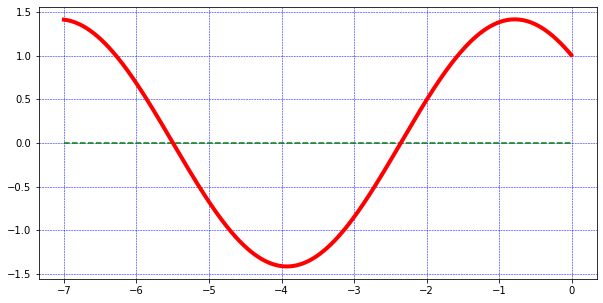

In [ ]:
def func1(x):
  return np.cos(x)-np.sin(x)
a,b=-7,0
x = np.arange(a, b, (b-a)/1000)
y=  func1(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'g--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='b', linestyle='--', linewidth=.5)
plt.show()

Encontremos la raíz más cercana a -2 con con el método brenth

In [ ]:
root = brenth(func1, -3, -1)
print("raíz x=",root," f(x)=",func1(root))

raíz x= -2.356194490192345  f(x)= 1.1102230246251565e-16


Para ver el número de iteraciones realizadas en el cálculo de la raíz usamos:

In [ ]:
root = brenth(func1, -6, -4, maxiter=10, full_output=True, disp=False)
print(root)

(-5.497787143782138,       converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: -5.497787143782138)


Es decir usamos 7 iteraciones para obtener la raíz $x= -2.356194490192345$

---



Método fsolve:
Es un método vectorial que hace uso del método de Newton junto a otros métodos. Tiene los siguientes parámetors por defecto:

scipy.optimize.fsolve(f, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
Las funciones de algunos de estos parámetros son:
col_der: Calcular el jacobianode la funciónrespecto a columnas o filas.
xtol: Detiene el programa si el relativo error entre dos iteraciones consecutivas es mayor al valor de xtol
args:contiene argumentos extra de $f$.
maxfev: es el número máximo en que se llama a f. Consideremos el siguiente ejemplo donde se usa este método para resolver $(x_0)\cos(x_0)=4$, $x_1=5$

In [ ]:
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1],full_output=1)
root


(array([6.50409711, 0.90841421]), {'fjac': array([[-0.56248005, -0.82681085],
         [ 0.82681085, -0.56248005]]),
  'fvec': array([3.73212572e-12, 1.61710645e-11]),
  'nfev': 17,
  'qtf': array([6.25677420e-08, 2.40104774e-08]),
  'r': array([-1.0907073 , -1.7621827 , -7.37420598])}, 1, 'The solution converged.')